-----------------------
#### Implement the grid world problem
---------------

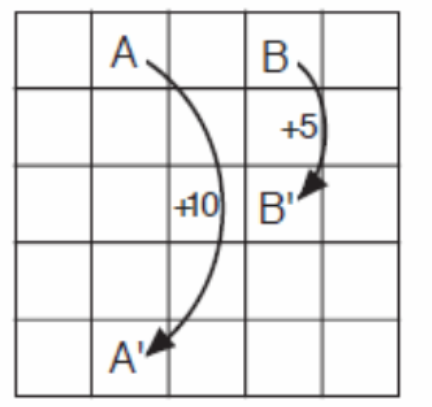

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

#from tabulate import tabulate

import seaborn
import matplotlib.pyplot as plt

In [3]:
n_grid_rows = 5
n_grid_cols = 5

In [4]:
gamma        = 0.9

n_plots_rows = 4
n_plots_cols = 3

# number of times we will go through the whole grid
n_iters = 12

In [5]:
def compute_value_funcs(grid):
    
    fig, ax = plt.subplots(nrows=n_plots_rows, ncols=n_plots_cols, figsize=(18, 10))
    
    for num in range(n_iters): 
        for i in range(n_grid_rows):        # all the rows
            for j in range(n_grid_cols):    # all the columns
        
                # if going up takes us out of the grid then its value be 0
                up_grid = grid[i-1][j] if i > 0 else 0   
                
                # if going down takes us out of the grid then its value be 0
                down_grid = grid[i+1][j] if i < 4 else 0  
                
                # if going left takes us out of the grid then its value be 0
                left_grid = grid[i][j-1] if j > 0 else 0  
                
                # if going right takes us out of the grid then its value be 0
                right_grid = grid[i][j+1] if j < 4 else 0  

                all_dirs = [up_grid, down_grid, left_grid, right_grid]     

                value = 0  
                
                if   i==0 and j==1:                   # the position of A
                    value = 10 + gamma * grid[4][1]
                elif i==0 and j==3:                   # the position of B
                    value =  5 + gamma * grid[2][3]
                else:
                    for direc in all_dirs:
                        if direc != 0: 
                            value += .25 * ( 0 + gamma * direc)       # if we don't go out of the grid
                        else:
                            value += .25 * (-1 + gamma * grid[i][j])  # if we go out of the grid
            
                grid[i][j] = value

        seaborn.heatmap(    data        = np.round(grid, 2), 
                            ax          = ax[divmod(num, n_plots_cols)],
                            annot       = True, 
                            fmt         = ".3f",
                            annot_kws   = {"size":8},
                            yticklabels = False,
                            xticklabels = False,
                            cbar        = False,
                            # linecolor  ="#282828", 
                            # linewidths = 0.1,
                            # cmap       = "Oranges_r"
                    )

**initialize value funcs =0**

In [6]:
grid = np.zeros((n_grid_rows, n_grid_cols))
grid

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

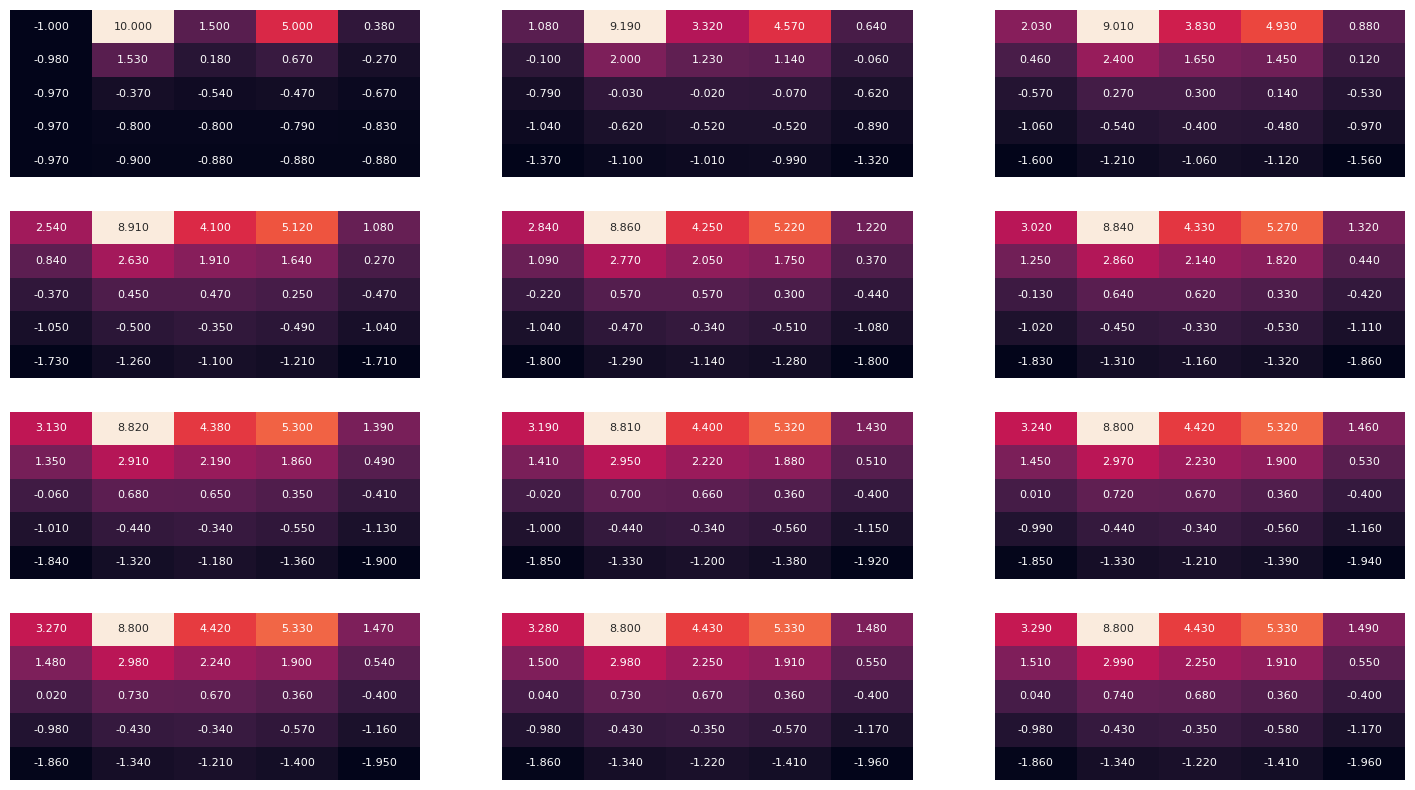

In [7]:
compute_value_funcs(grid)